In [ ]:
!nvidia-smi

Fri Aug 30 14:03:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
model = YOLO('yolov8x')

100%|██████████| 131M/131M [00:01<00:00, 124MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return t

In [15]:
import cv2

# Load the image
image = cv2.imread('/content/input_pic1.png')

# Define the new size (width, height)
new_size = (640, 480)

# Resize the image
resized_image = cv2.resize(image, new_size)

# Save the resized image if needed
cv2.imwrite('/content/resized_image1.png', resized_image)

True

In [16]:
results = model.predict(source='/content/resized_image1.png', conf=0.25,save=True)


image 1/1 /content/resized_image1.png: 480x640 19 persons, 1 tennis racket, 1 tv, 76.9ms
Speed: 1.9ms preprocess, 76.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


In [17]:
results[0].boxes.xyxy

tensor([[9.4231e-02, 2.4463e+02, 3.7201e+01, 3.9530e+02],
        [7.4836e+01, 3.3394e+02, 1.1905e+02, 4.2760e+02],
        [2.4287e+02, 3.0598e+02, 3.1661e+02, 4.2804e+02],
        [3.0463e+02, 1.6046e+02, 3.4863e+02, 2.9274e+02],
        [4.6085e+02, 1.0912e+02, 4.9408e+02, 2.0025e+02],
        [4.9081e+02, 1.1296e+02, 5.2153e+02, 2.0270e+02],
        [2.6285e+02, 1.9235e+02, 3.0414e+02, 3.3829e+02],
        [1.9995e+02, 2.4941e+02, 2.4589e+02, 3.7621e+02],
        [2.2327e+02, 1.8714e+02, 2.7086e+02, 3.1936e+02],
        [5.7394e+02, 1.1069e+02, 6.0485e+02, 2.2503e+02],
        [3.5522e+02, 1.0693e+02, 3.8773e+02, 1.9147e+02],
        [4.7628e+01, 5.2211e+01, 1.1658e+02, 9.7449e+01],
        [4.2436e+02, 1.0681e+02, 4.5068e+02, 1.9342e+02],
        [4.0189e+02, 1.0727e+02, 4.2888e+02, 1.9440e+02],
        [5.2792e+02, 1.2541e+02, 5.5973e+02, 2.0739e+02],
        [1.7568e+02, 2.0326e+02, 2.1617e+02, 2.8424e+02],
        [6.1865e+02, 1.2612e+02, 6.3976e+02, 2.1568e+02],
        [3.856

In [18]:
results[0].boxes.conf

tensor([0.8593, 0.8455, 0.8043, 0.7890, 0.6856, 0.6502, 0.5950, 0.5510, 0.5315, 0.5155, 0.4998, 0.4423, 0.4331, 0.4298, 0.4181, 0.3664, 0.3435, 0.3377, 0.3165, 0.2890, 0.2522], device='cuda:0')

In [19]:
results[0].boxes.cls

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 62.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 38.], device='cuda:0')

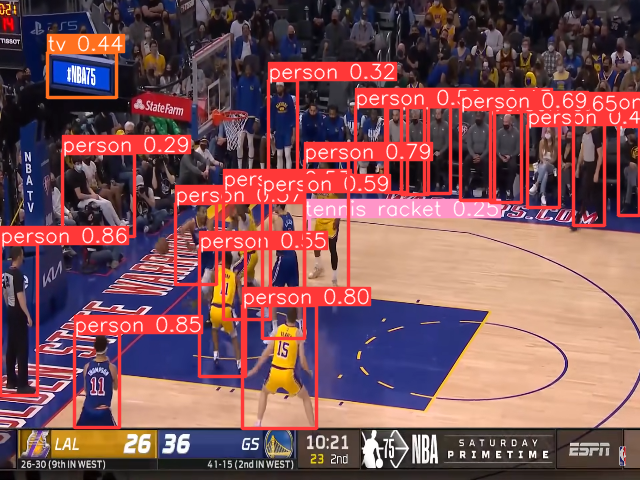

In [20]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/content/runs/detect/predict/resized_image1.png'))


In [21]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [22]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tO3VYYfIuaURMWVTIXck")
project = rf.workspace("home-ce5fo").project("basketball-broadcast_v2")
version = project.version(1)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Basketball-broadcast_v2-1 in yolov8:: 100%|██████████| 2008/2008 [00:00<00:00, 5310.18it/s]


In [24]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True


/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

In [25]:
!ls {HOME}/runs/detect/train/


args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1725028061.a5437c4342f4.6411.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch660.jpg	weights
P_curve.png					    train_batch661.jpg
PR_curve.png					    train_batch662.jpg


/content


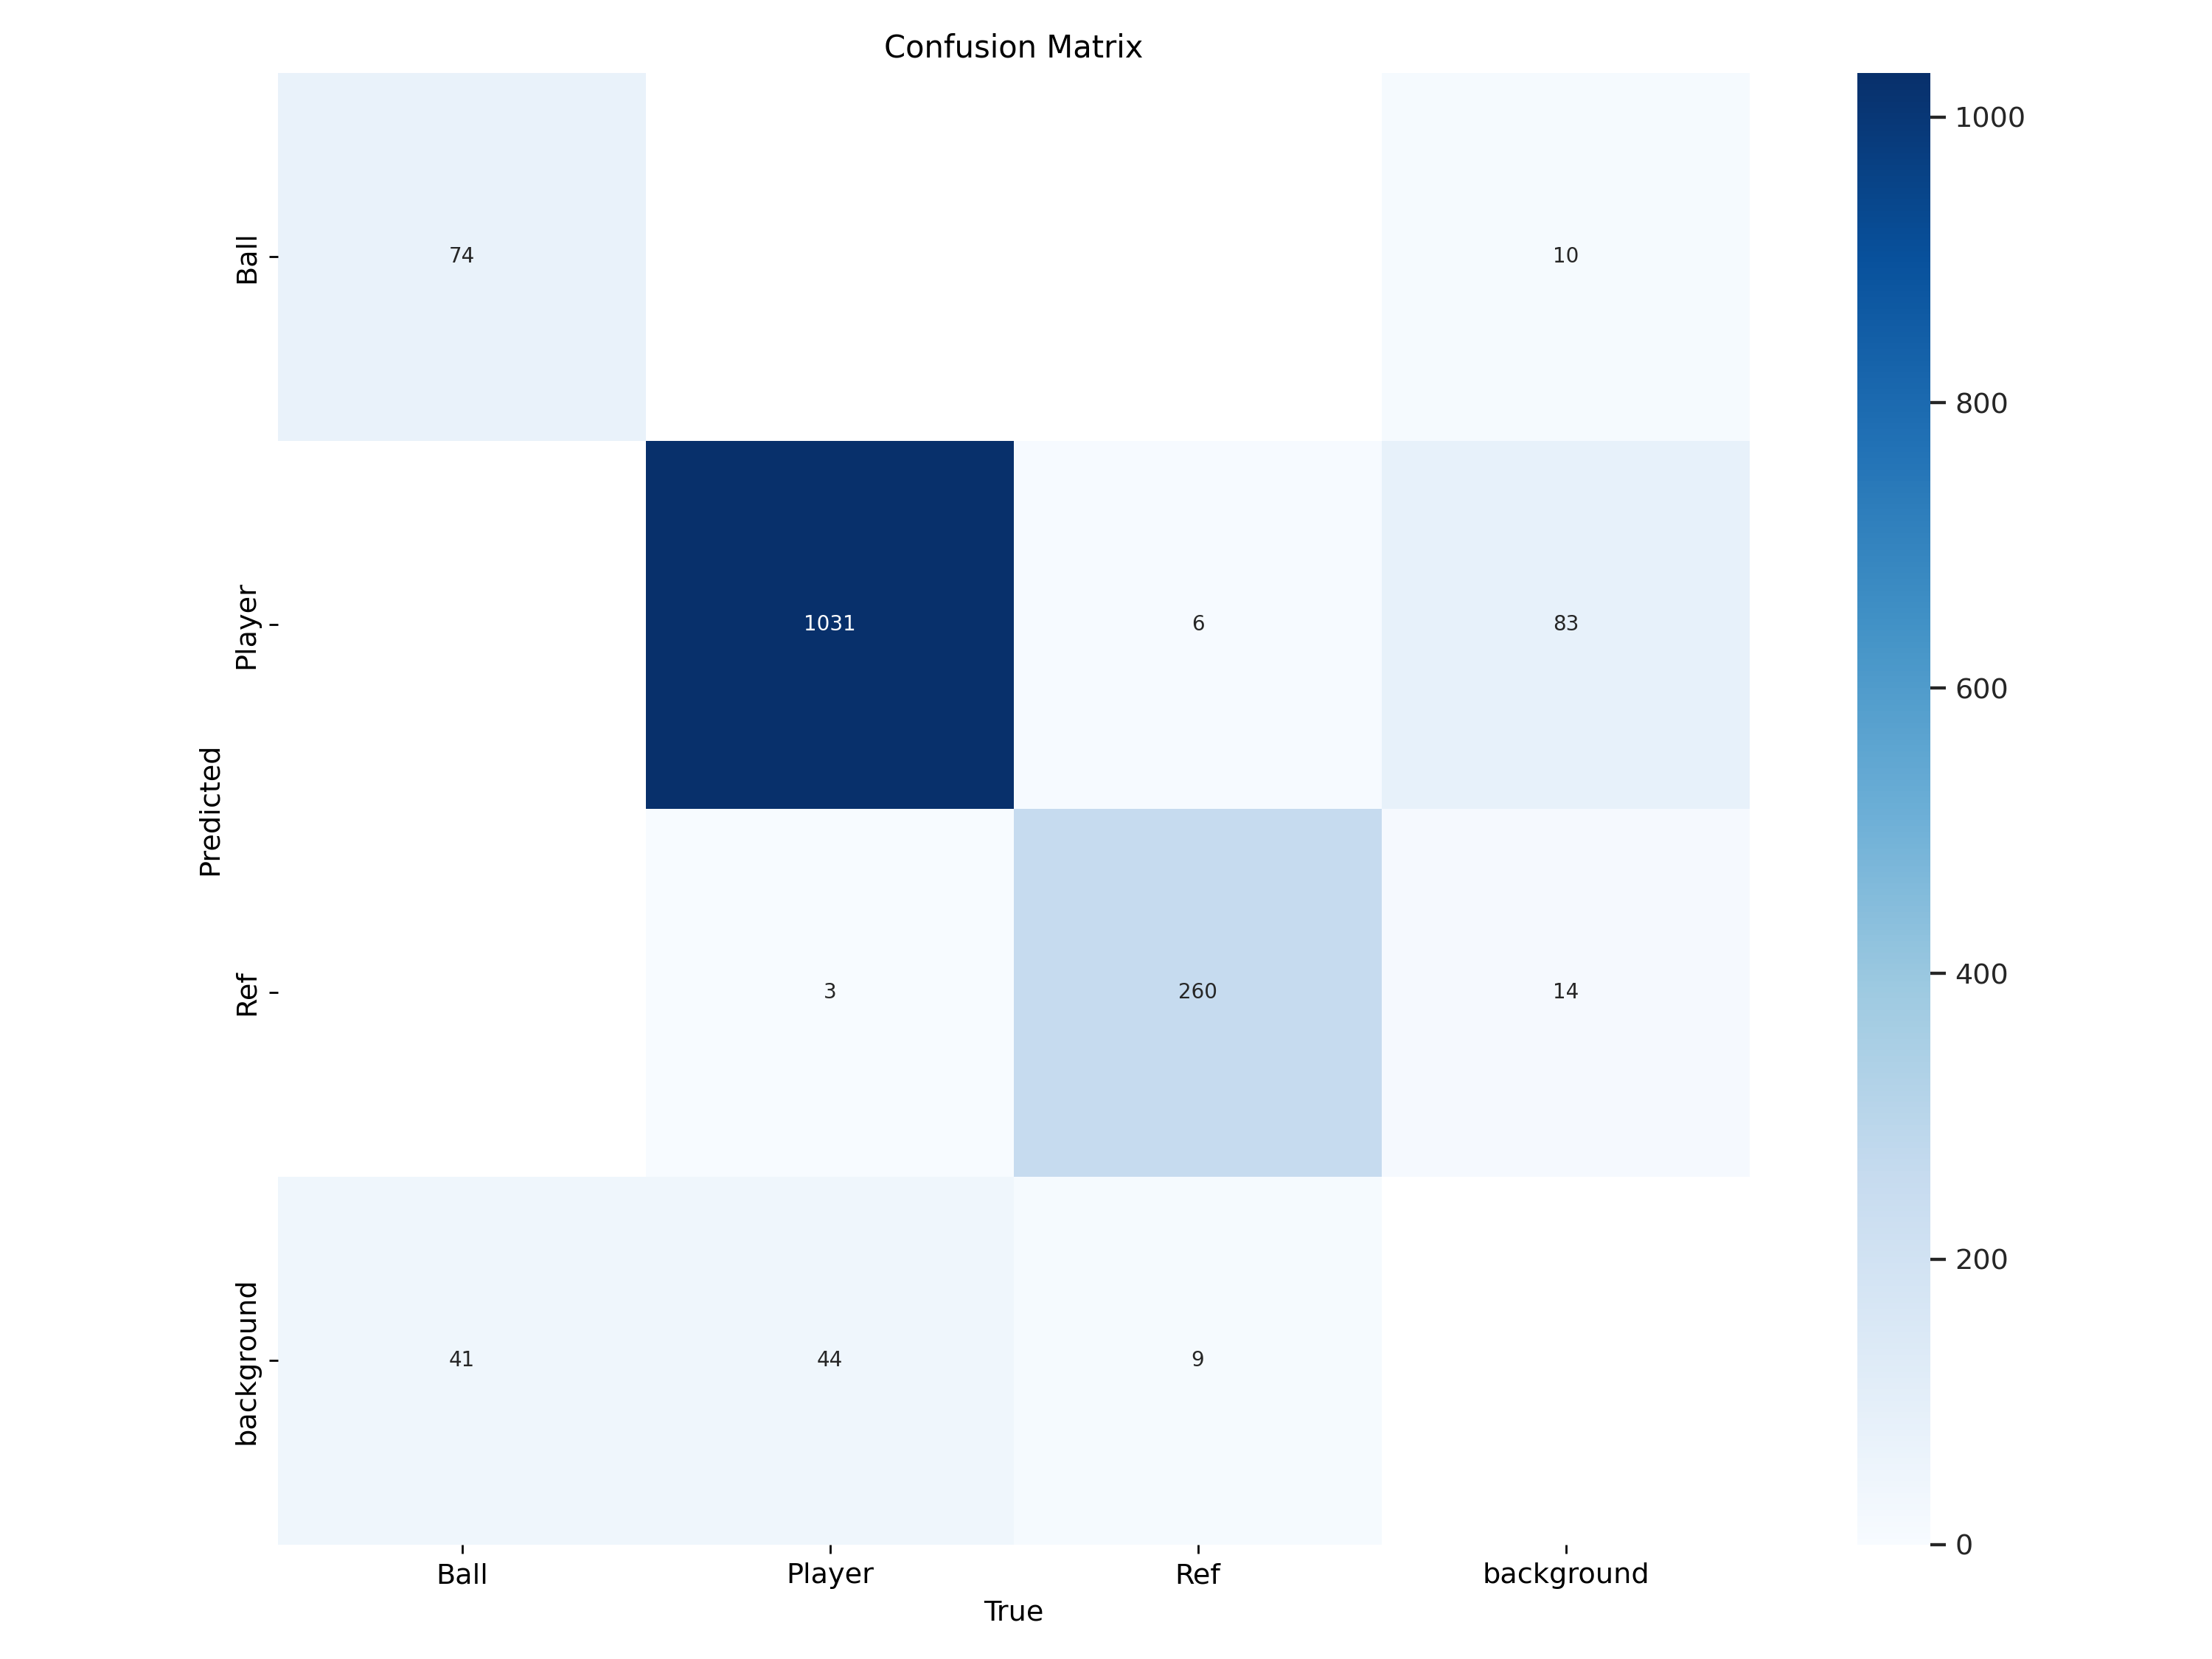

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


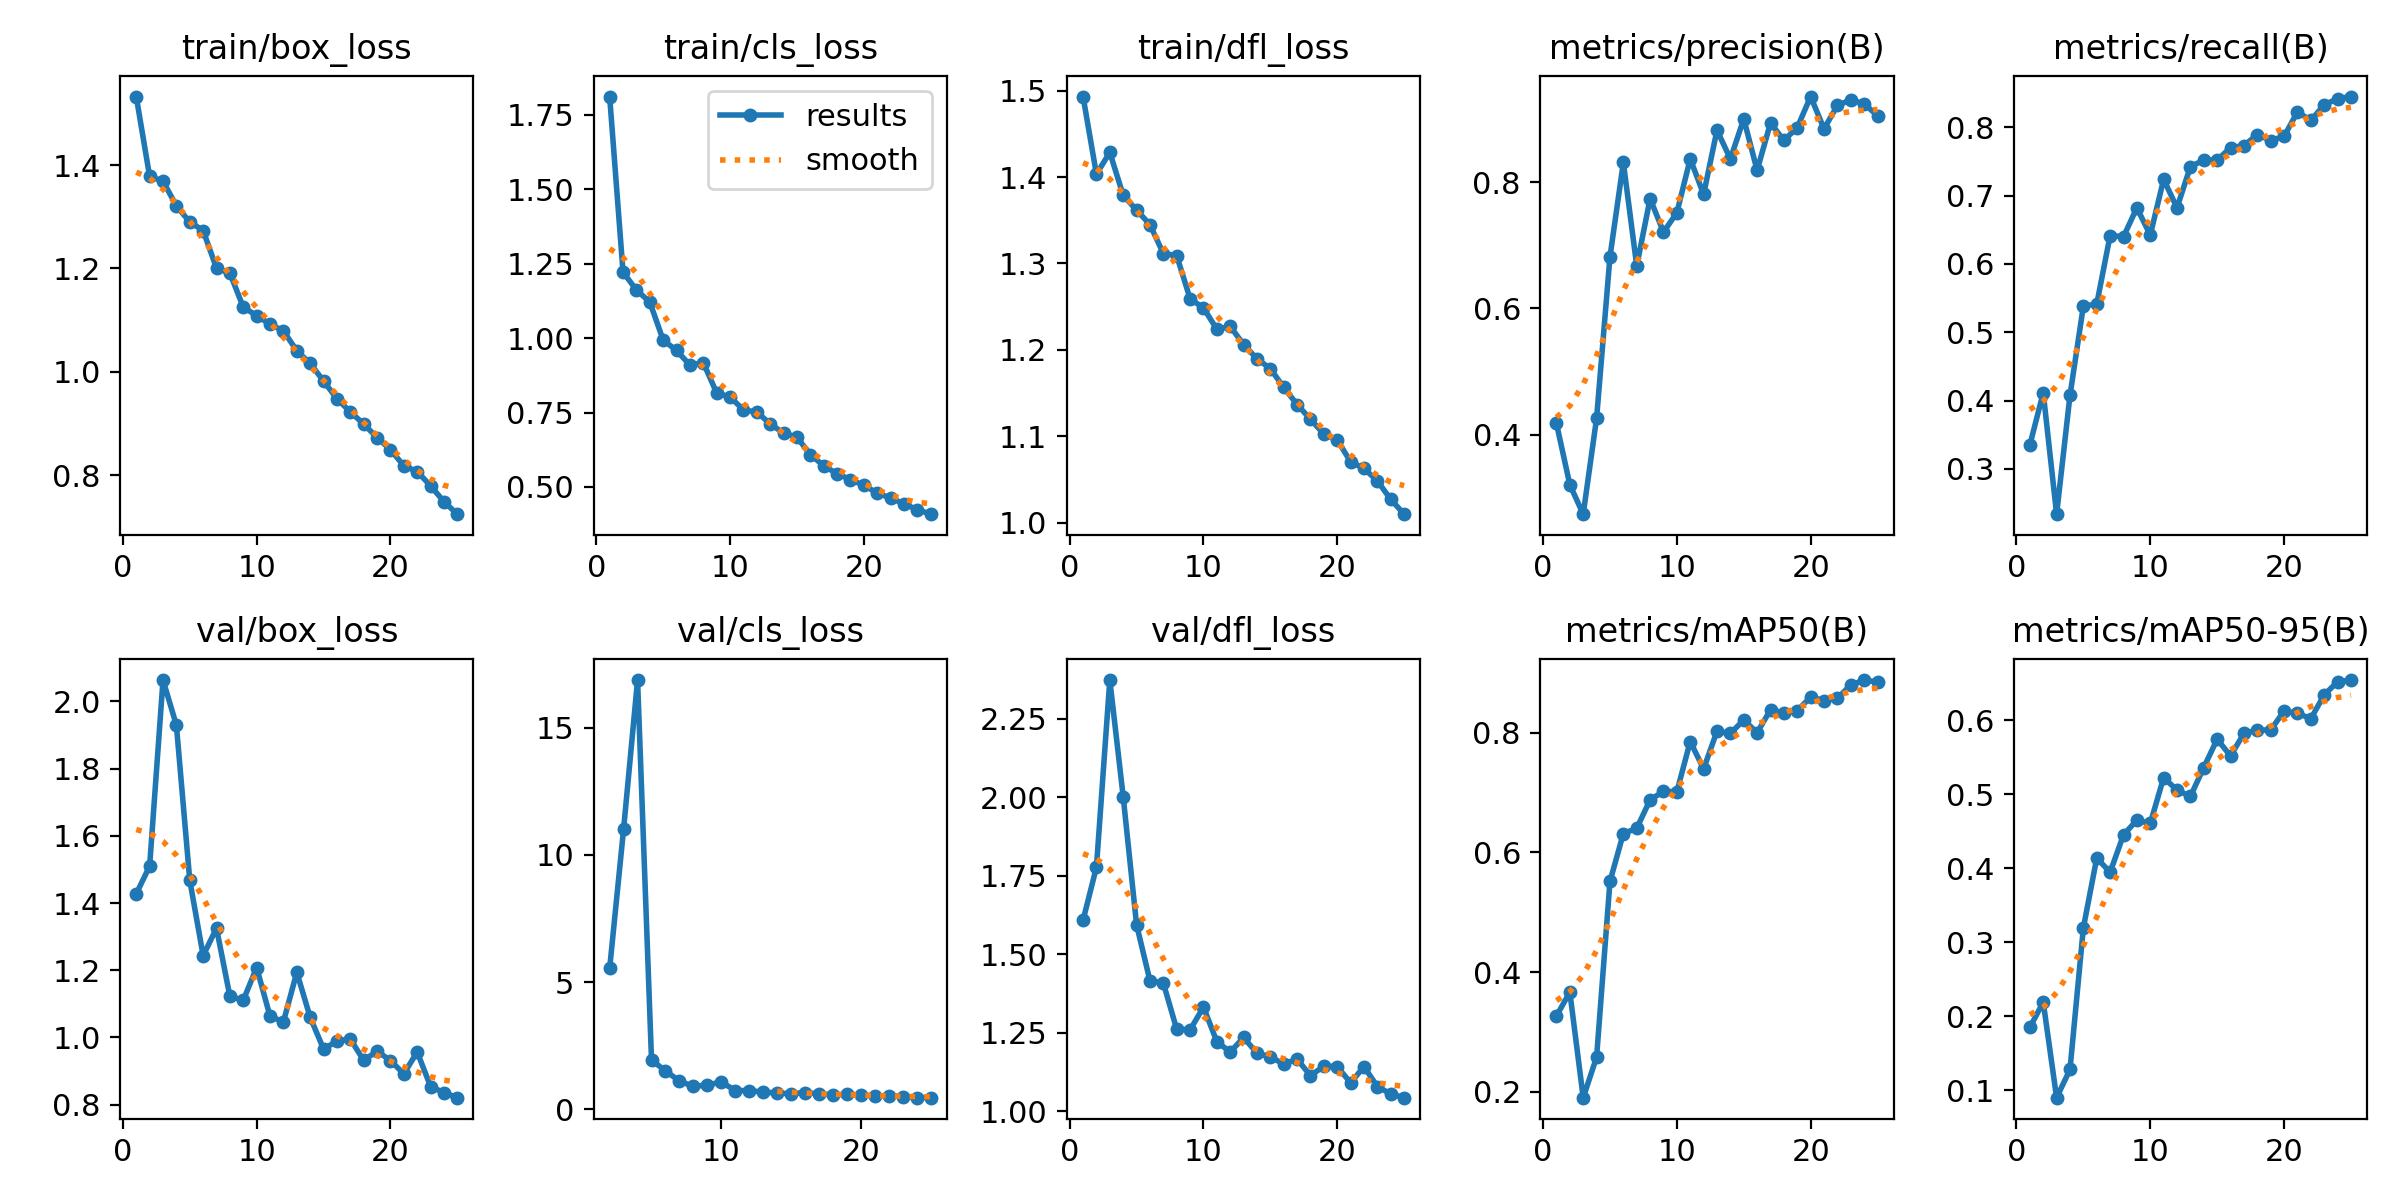

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


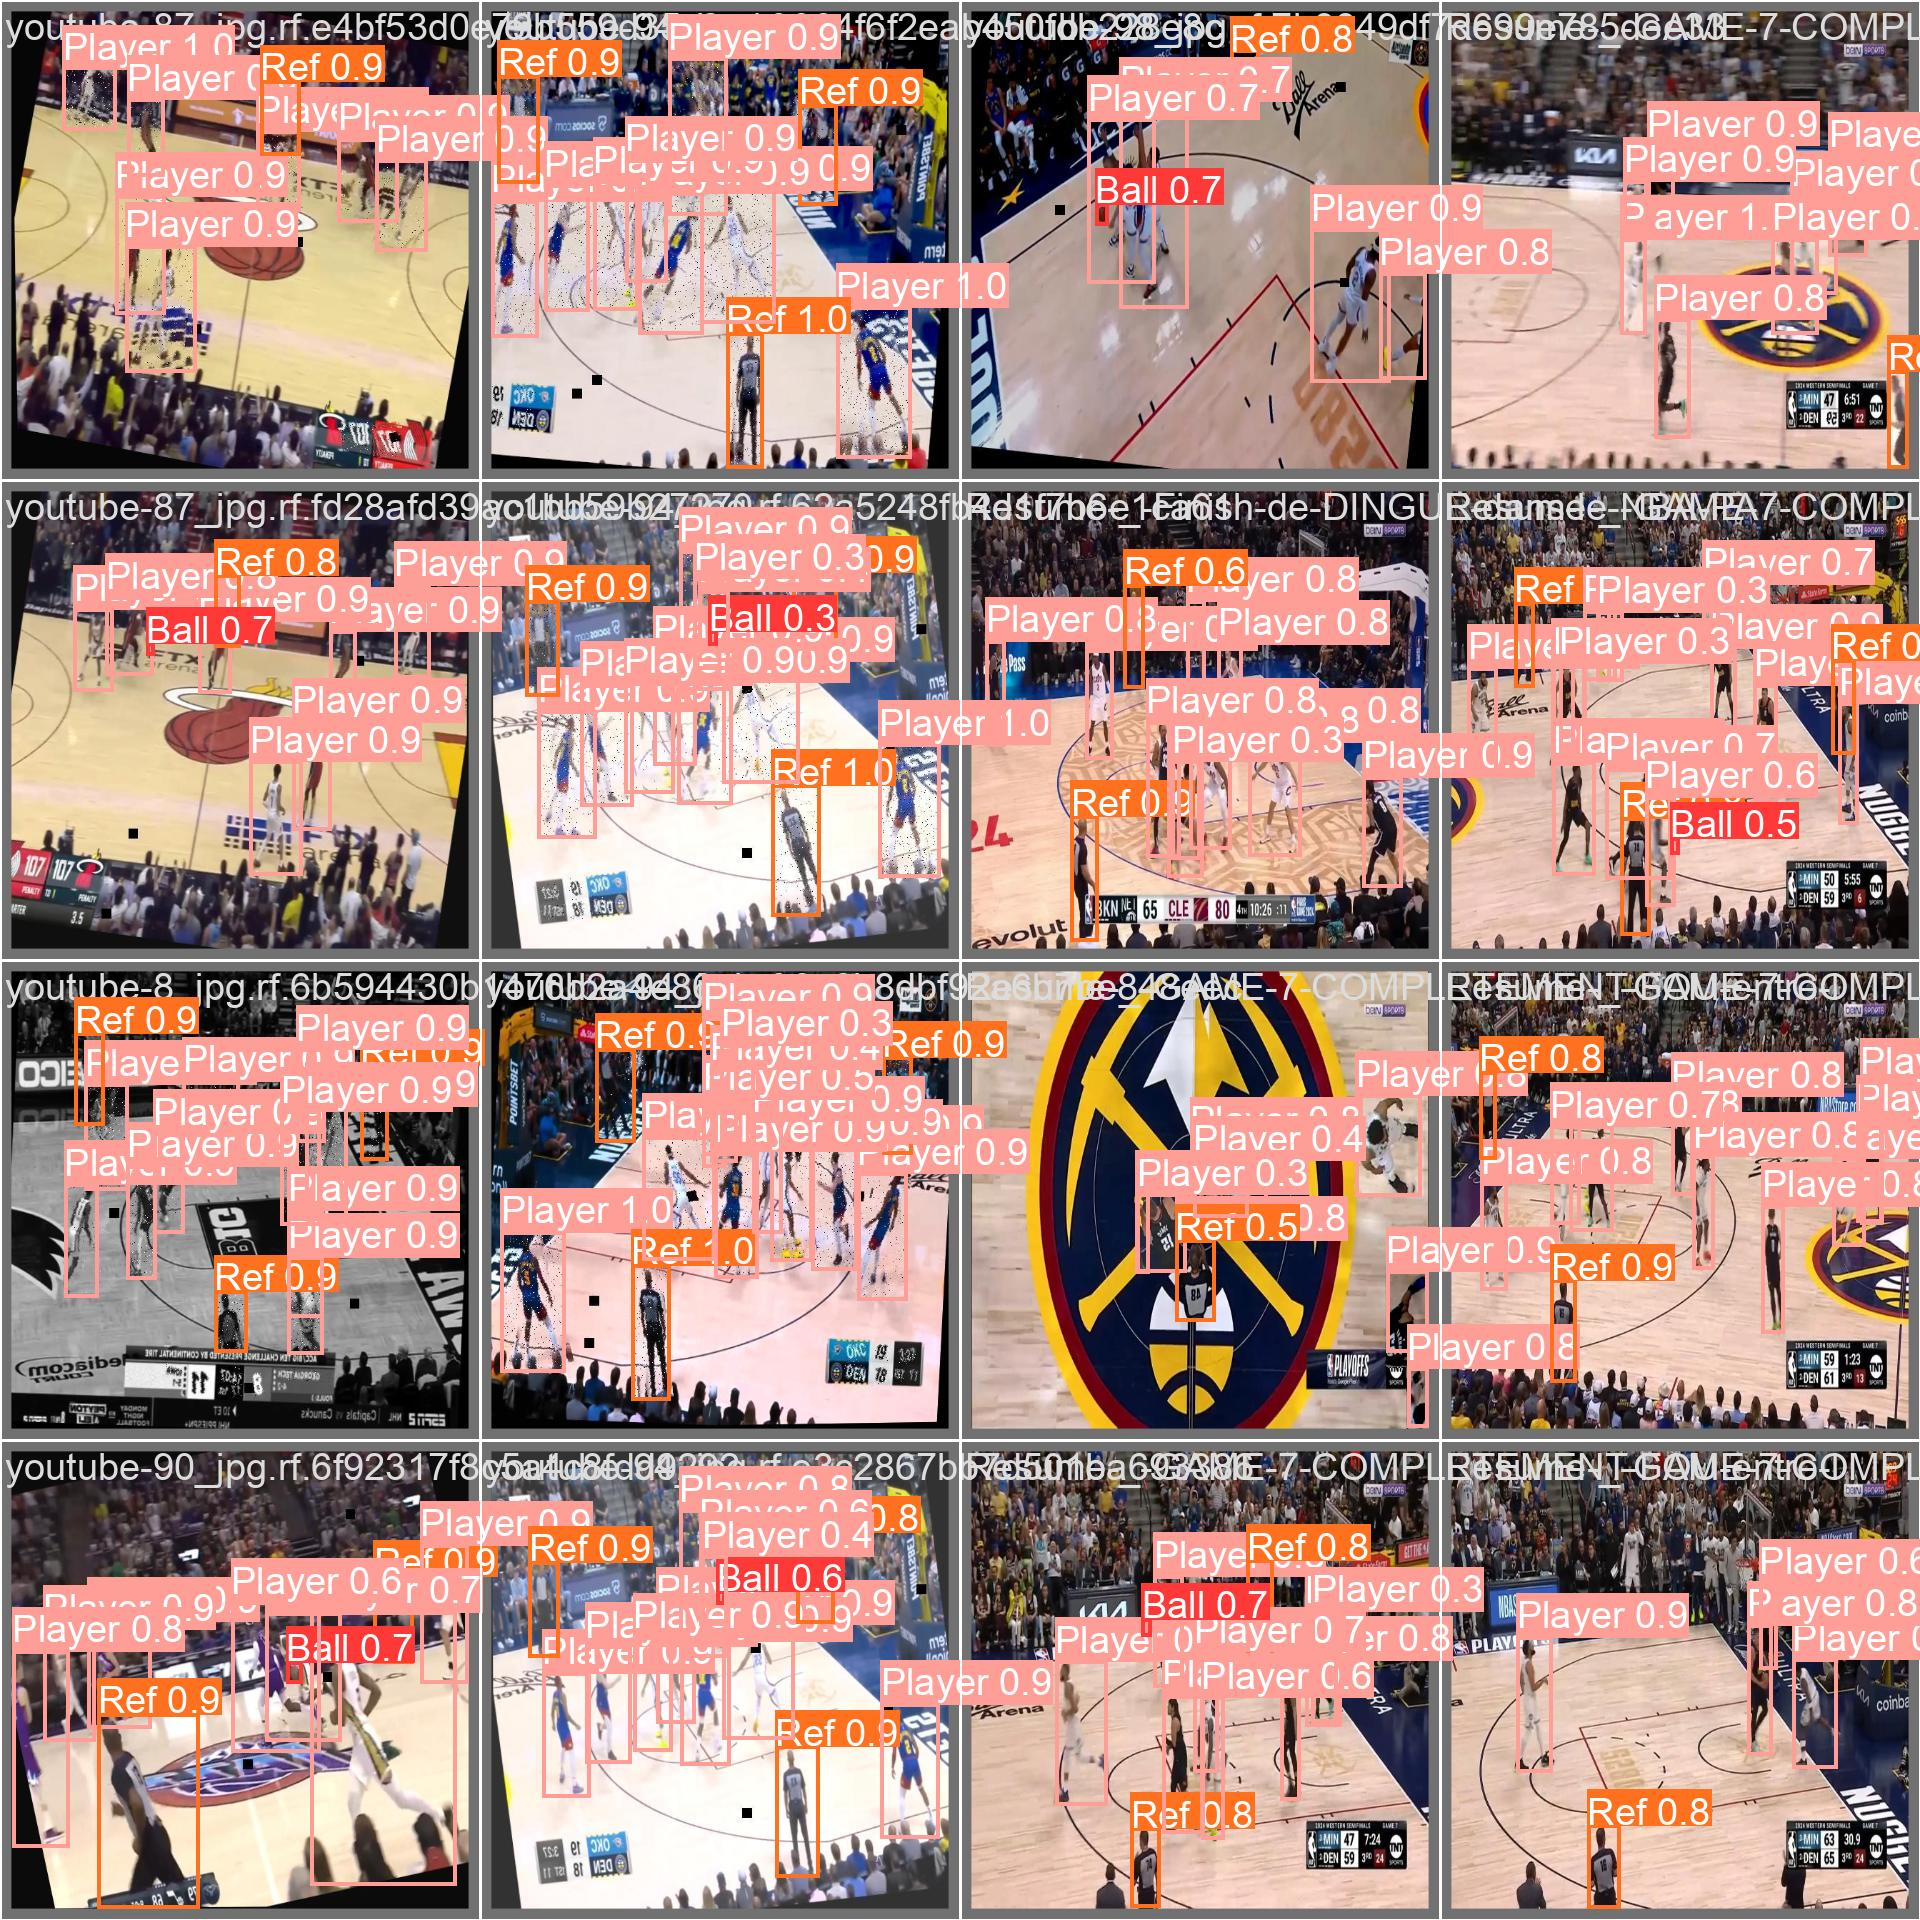

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [29]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

In [30]:
trained_model_v1 = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [33]:
trained_results_v1 = trained_model_v1.predict(source='/content/resized_image1.png', conf=0.25,save=True)


image 1/1 /content/resized_image1.png: 480x640 1 Ball, 7 Players, 2 Refs, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


In [34]:
trained_results_v1[0].boxes.xyxy

tensor([[  0.8274, 242.9436,  32.3322, 391.3618],
        [305.5591, 154.6769, 346.7702, 292.3746],
        [242.9328, 301.4003, 314.3108, 428.5688],
        [262.3063, 191.1449, 306.9210, 340.9587],
        [571.0798, 111.6772, 606.4551, 231.0421],
        [204.5897, 245.2343, 245.4290, 380.5230],
        [231.0241, 188.7736, 266.7817, 319.8180],
        [178.8036, 201.4654, 221.2075, 329.9223],
        [155.3526, 235.7065, 168.2972, 254.4696],
        [ 77.0230, 332.9089, 119.5204, 469.1138]], device='cuda:0')

In [35]:
trained_results_v1[0].boxes.conf

tensor([0.8796, 0.8795, 0.8523, 0.8066, 0.7926, 0.7600, 0.6835, 0.6372, 0.5795, 0.4802], device='cuda:0')

In [36]:
trained_results_v1[0].boxes.cls

tensor([2., 1., 1., 1., 2., 1., 1., 1., 0., 1.], device='cuda:0')

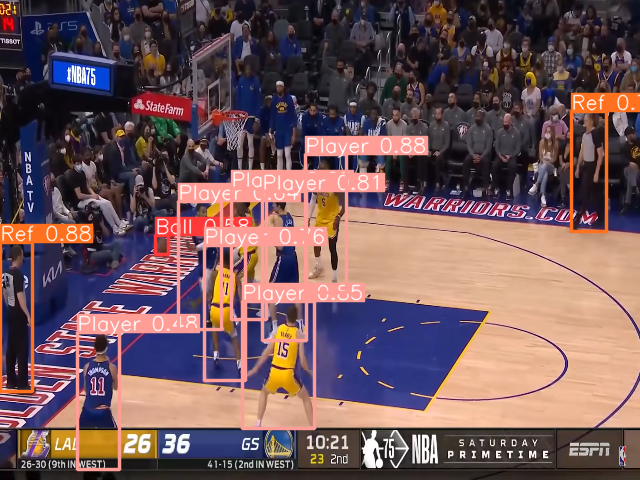

In [37]:
display(Image(filename='/content/runs/detect/predict2/resized_image1.png'))

In [41]:
vedio_results = trained_model_v1.predict(source='/content/curry.mp4', conf=0.25,save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/219) /content/curry.mp4: 384x640 10 Players, 3 Refs, 61.5ms
video 1/1 (2/219) /content/curry.mp4: 384x640 10 Players, 3 Refs, 61.5ms
video 1/1 (3/219) /content/curry.mp4: 384x640 10 Players, 3 Refs, 43.0ms
video 1/1 (4/219) /content/curry.mp4: 384x640 12 Players, 3 Refs, 42.1ms
video 1/1 (5/219) /content/curry.mp4: 384x640 1 Ball, 10 Players, 3 Refs, 41.1ms
video 1/1 (6/219) /content/curry.mp4: 384x640 1 Ball, 10 Players, 3 Refs, 40.1ms
vi